<a href="https://colab.research.google.com/github/MaraD98/INMERSION_DATOS_AULA_2/blob/main/INMERSION_DATOS_CLASE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Resolución de ejercicios clase 1 y Tratamiento de datos y primeras gráficas

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
columnas = {'Baños': 'Banos', 'Área': 'Area' }
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
8081,Apartamento,Apartamento en venta en San Patricio,1,1,54,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 420.000.000
5191,Apartamento,Apartamento en venta en Pasadena,3,4,105,Pasadena,NaN,$ 350.000.000
5664,Apartamento,Apartamento en venta en Usaquén,3,2,98,Usaquén,Usaquén,$ 458.000.000
3957,Apartamento,Apartamento en venta en El Contador,2,3,86,El Contador,Los Cedros,$ 540.000.000
3229,Casa,Casa en venta en La Soledad,11,1,520,La Soledad,Teusaquillo,$ 1.500.000.000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
#Al ser una variable tipo string no se podian sumar los valores del precio 
#ni sacar un minimo o un máximo
type(inmuebles.Valor[0])

str

In [ ]:
#concatena nada mas
inmuebles.Valor[0]+inmuebles.Valor[1]

'$ 360.000.000$ 670.000.000'

In [ ]:
#funcion split() separa una cadena de texto en funcion a un parametro
inmuebles.Valor[0].split()

['$', '360.000.000']

In [ ]:
#Devuelve un formato de dos columnas
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [ ]:
#Creo una variable y asigno lo anterior, y luego asigo ese valor a un nuevo atributo
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
1995,Apartamento,Apartamento en venta en Barrios Unidos,3,3,135,Barrios Unidos,Los Andes,$ 690.000.000,$,690.000.000
6090,Apartamento,Apartamento en venta en Santa Barbara,4,4,124,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 600.000.000,$,600.000.000
548,Apartamento,Apartamento en venta en Villa Alsacia,3,2,55,Villa Alsacia,KENNEDY: Castilla + Bavaria,$ 240.000.000,$,240.000.000


In [ ]:
#Observamos que estas nuevas columnas siguen siendo objeto y no un valor
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [ ]:
#Remplazamos el punto que aparece en el string para dejar solamente el numero
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
#Convertimos el string en float y tambien le restamos 6 ceros para una mejor visualizacion
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [ ]:
#Ajustar posiciones decimales
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
#funcion loc() permite localizar una fila en específico
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [ ]:
#Aqui y en el ejemplo anterior vemos errores de typeo en los registros
#Por lo que como analista debería hacer un tratamiento de dato, eliminarlo o caveriguar el dato correcto
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

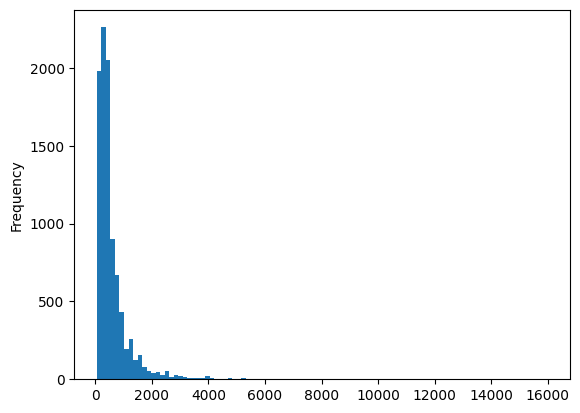

In [ ]:
#Distribucion de frecuencia de una variable a travez de un histograma
inmuebles['Precio_Millon'].plot.hist(bins=100)

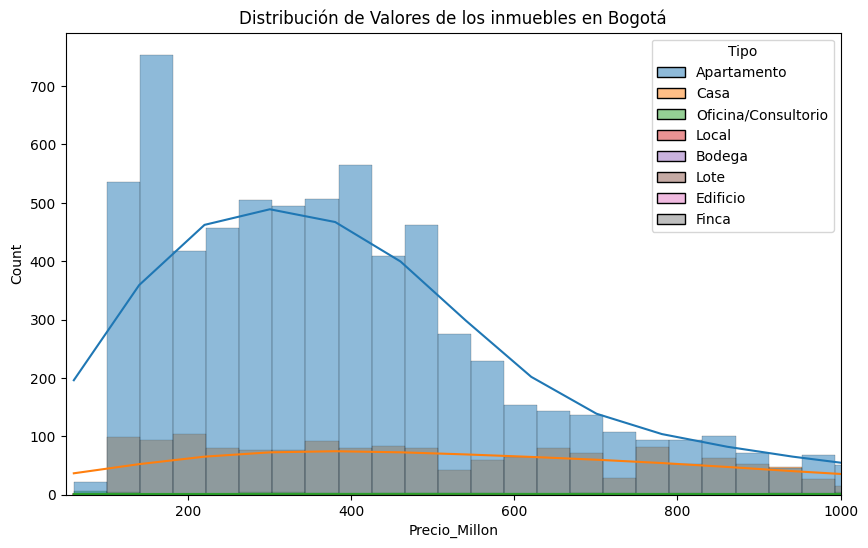

In [ ]:
#Importamos librerias de generación de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preparo mi lienzo, agrego título y modifico el límite,(kde es la curva), (hue es por si quiero agregar otra columna)
plt.figure(figsize=(10,6))
grafica= sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
#plt.ylim((0,100))
#Si quiero guardar mi grafico tengo que ejecutar la siguiente líne
#plt.savefig('/url de la direccion',format='png')
plt.show()

##**Desafíos**
###1. Estudiar mejor el histograma de valores, seleccionas 3 tipos de inmuebles(Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)
###2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.
Tip: Para llegar al m2 hay que dividir el precio por el m2 para llegar a esa variable

In [ ]:
#Ejercicio 1
inmuebles['Tipo'].unique()

array(['Apartamento', 'Casa', 'Oficina/Consultorio', 'Local', 'Bodega',
       'Lote', 'Edificio', 'Finca'], dtype=object)

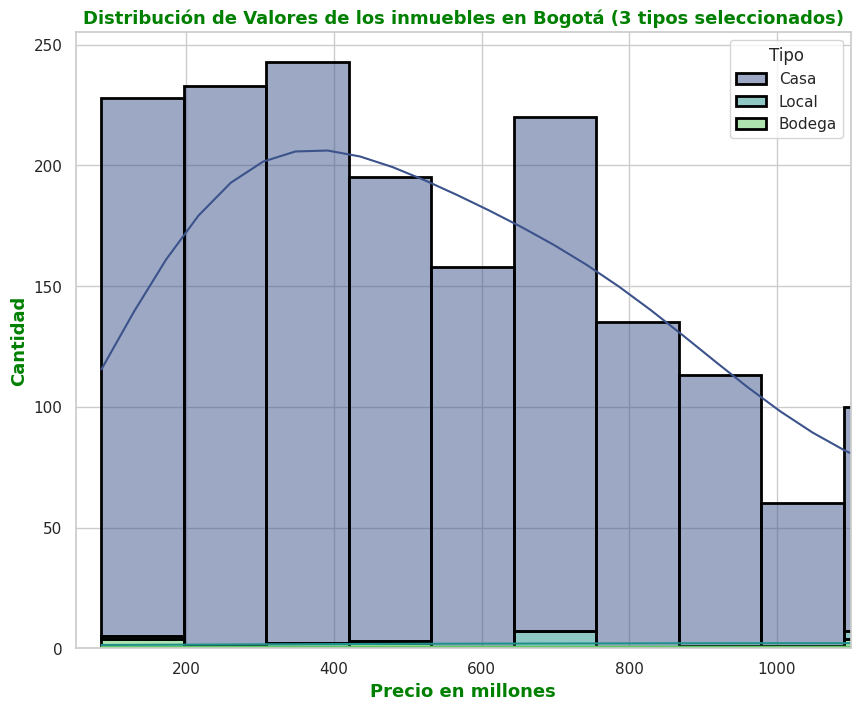

In [ ]:
#Forma1
caracteristicas =  {'fontsize': 13,
                  'fontweight': 'bold', 
                  'color': 'green'}
            
tipos_seleccionados = ((inmuebles.Tipo ==  'Casa') | 
                       (inmuebles.Tipo ==  'Bodega') |
                       (inmuebles.Tipo ==  'Local'))

plt.figure(figsize=(10,8))

grafica = sns.histplot(data = inmuebles[tipos_seleccionados], 
                       x = 'Precio_Millon',
                       edgecolor = "black",
                       linewidth = 2,
                       multiple='stack',
                       palette='viridis', 
                       kde = True, 
                       hue = 'Tipo')

#plt.pie(tipos_seleccionados)(grafico en torta)

grafica.set_title('Distribución de Valores de los inmuebles en Bogotá ' \
                  '(3 tipos seleccionados)', fontdict = caracteristicas)

grafica.set_xlabel("Precio en millones", fontdict = caracteristicas)
grafica.set_ylabel("Cantidad", fontdict = caracteristicas)

plt.xlim((50,1100))
plt.show()

In [ ]:
#Forma2
#encontrar todos los plots que contienen una especie en particular en el DataFrame 
tipos_selecciona2= inmuebles[inmuebles.Tipo.isin(['Casa','Bodega','Local'])]

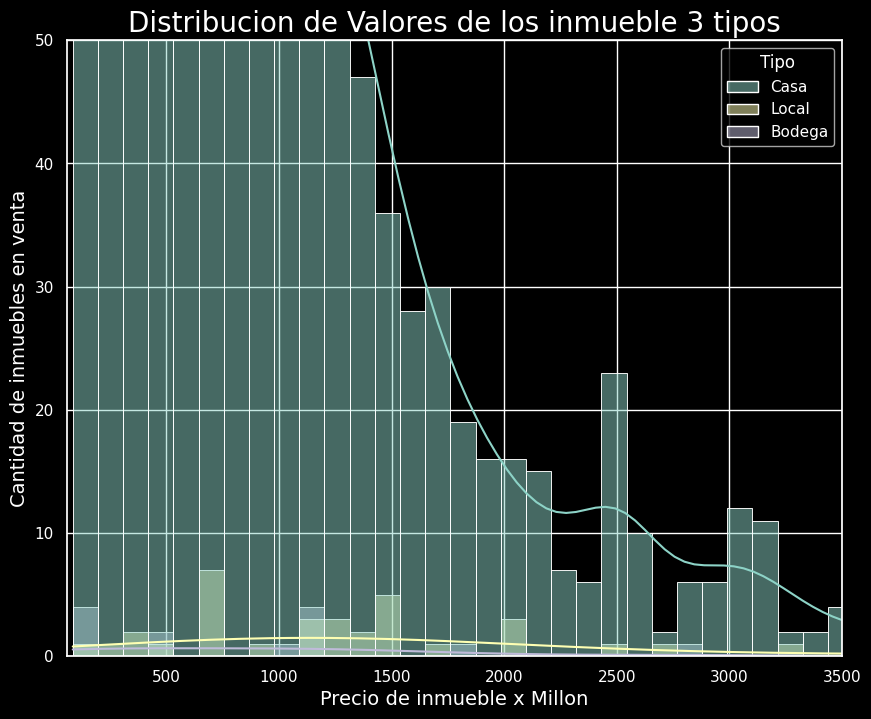

In [ ]:
plt.figure(figsize=(10,8))
#Para que el stilo se muestre, debo ponerlo despues del figsize
plt.style.use('dark_background')
grafica=sns.histplot(data=tipos_selecciona2, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribucion de Valores de los inmueble 3 tipos',fontsize=20)
plt.xlim((60,3500))
plt.ylim((0,50))
plt.xlabel("Precio de inmueble x Millon",fontsize=14)
plt.ylabel("Cantidad de inmuebles en venta",fontsize=14)

plt.show()

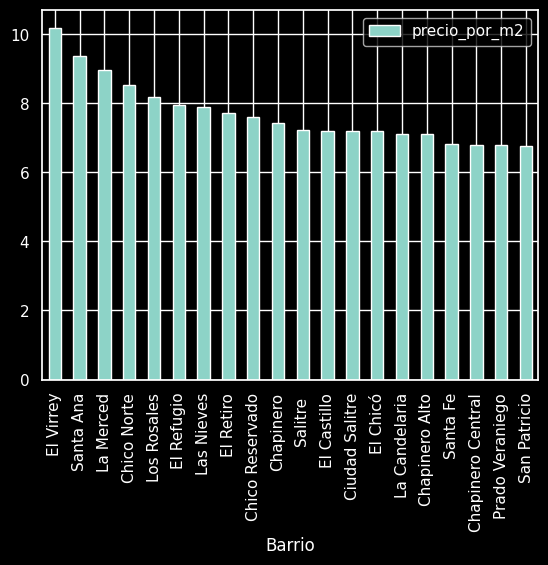

In [ ]:
#Ejercicio2
inmuebles['precio_por_m2'] = inmuebles.Precio_Millon / inmuebles.Area
plt.style.use('dark_background')
promedio_precio_m2_barrio = (inmuebles.groupby('Barrio')['precio_por_m2']
                                 .mean()
                                 .reset_index()
                                 .sort_values('precio_por_m2', ascending=False))

promedio_precio_m2_barrio.head(20).plot.bar('Barrio', 'precio_por_m2');